<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_2/Aula_4_Trabalhando_DateTime_e_Melt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4
## Preparando conteúdo anterior

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv", encoding = "ISO-8859-1",
                 skiprows = 3, sep = ";", skipfooter = 12,
                 thousands = ".", decimal = ",", engine = "python")
pd.options.display.float_format = "{:.2f}".format
use_col = df.mean().index.tolist()
use_col.insert(0, "Unidade da Federação")
use = df.loc[:,use_col]
use = use.set_index("Unidade da Federação")
use.sort_values(by = "Total") # crescente
total_ord = use.sort_values(by = "Total", ascending = False) # decrescente
total_ord = total_ord.drop("Total", axis = 1)
main_cols = total_ord.columns[6:]
total_ord = total_ord[main_cols]
total_ord = total_ord/1000000
total_ord.index = total_ord.index.str[3:] # Matar esse problema aqui de vez
ultimo_mes = total_ord.columns[-1]
gastos_ultimo_mes = total_ord[ultimo_mes]
gastos_prop_estado = gastos_ultimo_mes / gastos_ultimo_mes.sum()
tabelas_wiki = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
dados_populacao_raw = tabelas_wiki[0]
dados_populacao_raw

def limpeza(df1, df2):
  """limpeza, tratamento e join de dados"""
  df1 = df1.dropna().copy()
  df1.columns = ["posicao", "uf", "populacao", "porc", "pais"]
  df1.loc[:,"populacao"] = pd.to_numeric(df1.loc[:,"populacao"].str.replace(" ",""))
  df1 = df1.loc[:,["populacao", "uf"]]
  df1 = df1.set_index("uf")
  df1.index = df1.index.str.strip()

  for i in df2.index:
    df1.index = df1.index.str.replace(f"{i} {i}", i)

  return df1.join(df2)

gastos_e_populacao_recente = limpeza(dados_populacao_raw, gastos_ultimo_mes)

def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str): 
  # mes: str define que o tipo de mes só pode ser string
  # pd.DataFrame para definir que só pode ser DataFrame
  gastos_do_mes = todos_os_gastos.loc[:,mes]
  dados.loc[:, f"gastos_{mes}"] = gastos_do_mes * 1000000
  dados.loc[:, f"gasto_por_habitante_{mes}"] = dados.loc[:, f"gastos_{mes}"] / dados.loc[:, "populacao"]

mensal = total_ord.T

In [2]:
mensal.index

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar',
       '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul'],
      dtype='object', length=150)

# Seguindo

In [3]:
from datetime import date

In [4]:
# criando dicionario

meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

In [5]:
mensal.index = mensal.index.map(para_dia)

In [6]:
mensal.index

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01,
       2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01],
      dtype='object', length=150)

## Desafio 01 - Estudar a documentação do DateTime do Python, escolha dois métodos para se aprofundar, faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord:

In [7]:
import datetime

O datetime tem algumas funções interessantes para converter strings para datas, e vice versa. Uma função interessante é o strftime(), que nos permite extrair várias informações sobre o objeto datetime e representar qualquer aspecto que seja interessante: 

https://www.programiz.com/python-programming/datetime

https://www.w3schools.com/python/python_datetime.asp

In [8]:
now = datetime.datetime.now()

print(now.strftime("%Y %B %d %A"))

2021 June 08 Tuesday


Criando objeto datetime de uma string:

In [9]:
print(datetime.datetime.strptime(str("8 June 2021"), "%d %B %Y"))

2021-06-08 00:00:00


## Seguindo

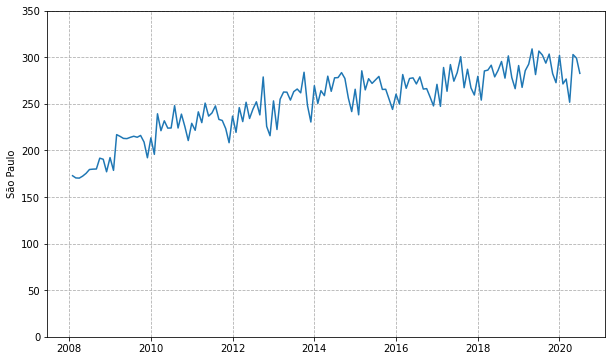

In [10]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = mensal, x = mensal.index, y = "São Paulo")
#plt.xticks(rotation = 30)
plt.ylim(0, 350)
plt.grid(linestyle = "--")
plt.show()

In [11]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [12]:
mensal_aberto = mensal.reset_index().melt(id_vars = ["index"], value_vars = mensal.columns)
mensal_aberto.columns = ["mes", "uf", "gasto"]

In [13]:
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


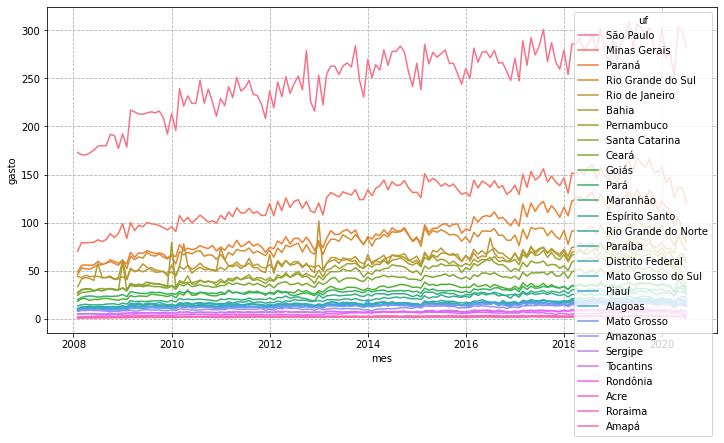

In [14]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(data = mensal_aberto, x = "mes", y = "gasto", hue = "uf")
plt.grid(linestyle = "--")
plt.show()

## Desafio 02 - Aprendemos a usar o melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto e chegar no mensal

In [15]:
print(mensal.shape)
print()
print(mensal_aberto.shape)

(150, 27)

(4050, 3)


In [16]:
mensal_fechado = mensal_aberto.pivot(index = "mes", columns = "uf", values = "gasto").copy() # values é opcional nesse caso, porque o pivot já identifica

In [17]:
mensal_fechado.head() # chamei de mensal "fechado" para separar que é um dataframe em que foi feita uma operação nova

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,7.93,8.28,70.30,48.86,10.87,20.13,26.22,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,9.42,9.79,79.12,55.61,12.35,22.15,30.72,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,9.39,9.00,79.05,56.12,12.68,23.44,30.59,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,9.38,9.84,79.27,55.57,13.26,23.86,31.41,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,9.45,10.26,79.61,56.09,12.25,23.50,28.95,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40


In [18]:
mensal_pivot_table = mensal_aberto.pivot_table(values = "gasto", index = "mes", columns = "uf")

In [19]:
mensal_pivot_table.head() # pivot table também parece funcionar da mesma forma. o pivot_table parece funcionar com uma funcao 
# aplicada por aggfunc, por exemplo. 
# https://stackoverflow.com/questions/30960338/pandas-difference-between-pivot-and-pivot-table-why-is-only-pivot-table-workin

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,7.93,8.28,70.30,48.86,10.87,20.13,26.22,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,9.42,9.79,79.12,55.61,12.35,22.15,30.72,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,9.39,9.00,79.05,56.12,12.68,23.44,30.59,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,9.38,9.84,79.27,55.57,13.26,23.86,31.41,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,9.45,10.26,79.61,56.09,12.25,23.50,28.95,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40


## Desafio 03 - Melhor o gráfico:

- Escolha apenas alguns estados
- Mude a palete de cores
- Posicione a legenda de forma mais adequada
- Adicione o título principal e nos eixos x e y

Para todos os estados:

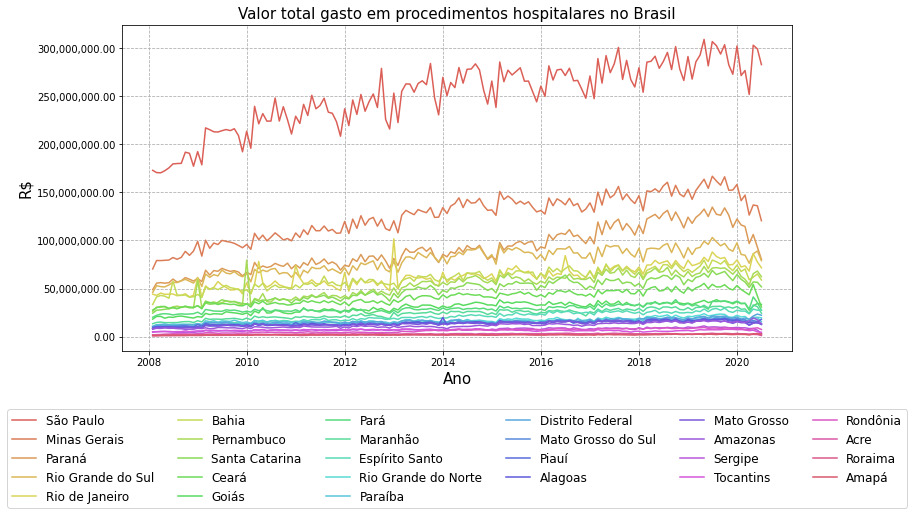

In [20]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(data = mensal_aberto, x = "mes", y = "gasto", hue = "uf", palette = sns.color_palette("hls", 27))
#ax = sns.lineplot(data = mensal_aberto, x = "mes", y = "gasto", hue = "uf")
plt.title("Valor total gasto em procedimentos hospitalares no Brasil", fontsize = 15)
ax.legend(loc = "lower center", ncol = 6, bbox_to_anchor = (0.5,-0.5), fontsize = 12)
plt.ylabel("R$", fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x*1000000)))
plt.grid(linestyle = "--")
plt.show()

Apenas estados do Sul:

In [21]:
sul = mensal_aberto.loc[mensal_aberto["uf"].isin(["Paraná", "Santa Catarina", "Rio Grande do Sul"])]

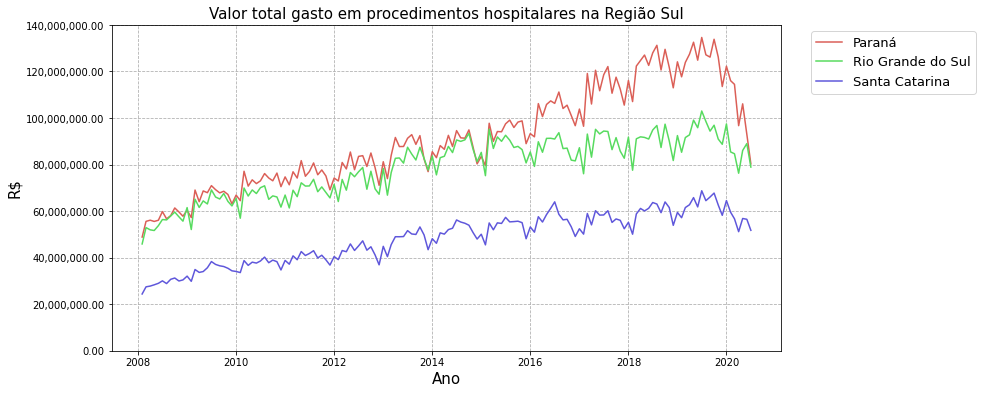

In [22]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(data = sul, x = "mes", y = "gasto", hue = "uf", palette = sns.color_palette("hls", 3))
plt.title("Valor total gasto em procedimentos hospitalares na Região Sul", fontsize = 15)
ax.legend(loc = "upper right", bbox_to_anchor = (1.3,1), fontsize = 13)
plt.ylim(0)
plt.ylabel("R$", fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x*1000000)))
plt.grid(linestyle = "--")
plt.show()